In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt 
from torch import nn

In [2]:
# define any continuous function here
def func(x):
    y = 2*x**3 + 4*x**2 + 4
    y = 2*(y-min(y))/(max(y) - min(y)) -1 
    return y

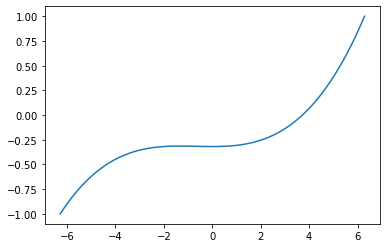

In [3]:
X = torch.linspace(-2*torch.pi, 2*torch.pi,100)
y  = func(X)
plt.plot(X,y)
X = X.view(-1,1)
y = y.view(-1,1)

In [4]:
class NeuralNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(NeuralNet, self).__init__()
        self.input_layer1 = nn.Linear(1,256)
        self.activation1 = nn.ReLU()
        self.layer1_layer2 = nn.Linear(256,256)
        self.activation2 = nn.ReLU()
        self.layer2_output = nn.Linear(256,1)
        self.activation_output = nn.Tanh()
    
    def forward(self,x):
        x = self.input_layer1(x)
        x = self.activation1(x)
        x = self.layer1_layer2(x)
        x = self.activation2(x)
        x = self.layer2_output(x)
        x = self.activation_output(x)
        return x

In [5]:
model = NeuralNet(1,1)

In [6]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [7]:
def train(model, criterion,optimizer,x,y,iter):
    all_loss = []
    for epoch in range(iter):
        y_hat = model(x)
        loss = criterion(y_hat, y)
        all_loss.append(loss.item())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    return all_loss

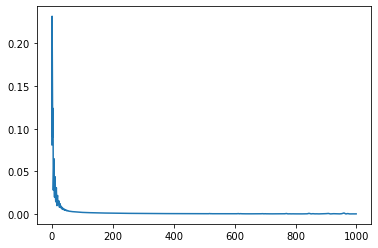

In [8]:
all_loss = train(model, criterion, optimizer, X, y, 1000)
plt.plot(all_loss)

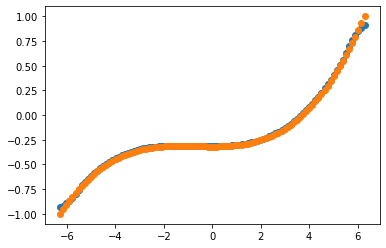

In [9]:
pred = model(X)
pred = pred.detach().numpy()
plt.scatter(X, pred)
plt.scatter(X,y)